# Data and Visualization

## The Iris Dataset

This is the famous *Iris Dataset*. We can see it has 3 attributes: Septal Length, Septal Width and Petal Length, and on class, which can be Setosa, Verisicolor or Virginica. It has 150 instances, 50 of each class.

**Attributes** are in the colums and **instances** in the rows.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv('/etc/data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Unsupervised Learning

**Goal**: Describe interesting patterns in the dataset *without* knowing the class labels

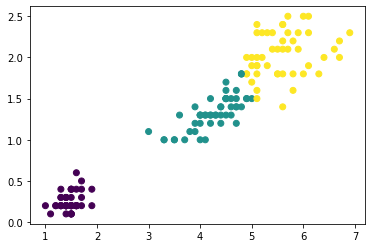

In [4]:
from sklearn.cluster import KMeans

# Use only 2 attribute columns: petal length and width (no class data)
iris_2c = iris.iloc[:,2:4]
# Run k-means clustering on only these two columns,
# using 1 data-point from each class to start the clusters
kmeans = KMeans(n_clusters=3, init=iris_2c.iloc[[1, 51, 101]], n_init=1).fit(iris_2c)
iris['cluster'] = kmeans.labels_

# Plot the result, using cluster for color
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['cluster'])

## The Actual Class of the Iris data

If we use the actual class of each instance, instead of the clusters, we get very similar results.

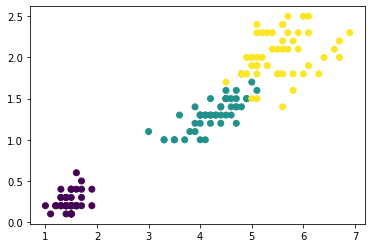

In [4]:
# Matplot requires the color to be specified as a number, so we use pd.factorize
# to convert the species (string) to a number
iris['species_int'] = pd.factorize(iris['species'])[0]
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['species_int'])

## The Difference

The two plots differ by only a few data points.

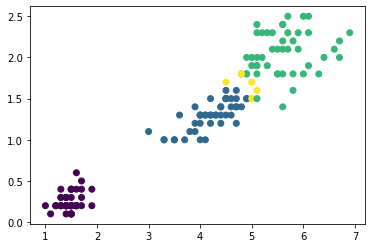

In [5]:
# Plot the cluster labels
iris['label'] = iris['cluster']
# But add a 4th label for points that were "misclassified" by the clustering
# Set the label only for those rows where cluster != species
iris.loc[iris['species_int'] != iris['cluster'], 'label'] = 3
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['label'])

## Summary Statistics

**Frequency**: How often does each value occur

In [6]:
# Tip: If you column is a valid property name, you can use "dot notation"
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

**Mode**: the *most* frequent value(s):

In [7]:
mode = iris.petal_length.mode()[0]
print("Mode: ", mode, " with count:", sum(iris.petal_length == mode))

Mode:  1.5  with count: 14


**Mean**: The average value. This is the most common summary statistic, but it is also very sensitive to outliers.

In [8]:
iris.petal_length.mean()

3.758666666666666

**Median**: The 50th percentile value or "middle" value

In [9]:
iris.petal_length.median()

4.35

**Variance**: Measure of the spread of the data:


In [10]:
iris.petal_length.var()

3.113179418344519

**Standard deviation**: Square root of the variance:


In [11]:
iris.petal_length.std()

1.7644204199522626

The `describe` function give us all of this at once:


In [12]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster,species_int,label
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.986667,1.000000,1.053333
std,0.828066,0.433594,1.764420,0.763161,0.810888,0.819232,0.895827
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000,3.000000


# Normalization

Different attirubte will have different mean and SD values:

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

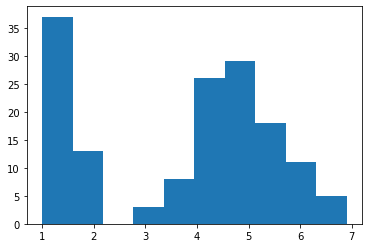

In [13]:
plt.hist(iris.petal_length)

After normalization, the mean will be 0 and SD 1:

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([-1.56873522, -1.23322757, -0.89771991, -0.56221226, -0.22670461,
         0.10880305,  0.4443107 ,  0.77981835,  1.11532601,  1.45083366,
         1.78634131]),
 <BarContainer object of 10 artists>)

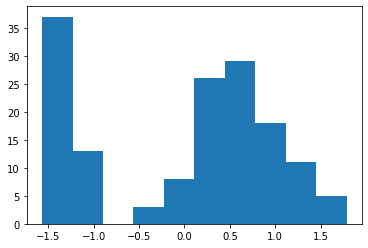

In [14]:
from sklearn import preprocessing
# sklearn's StandardScaler will z-score normalize a whole numeric dataframe
iris_norm = preprocessing.StandardScaler().fit_transform(iris.iloc[:,0:4])
plt.hist(iris_norm[:,2])

## Plotting Histograms

Histograms are a good way to visualize a single attribute:


(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

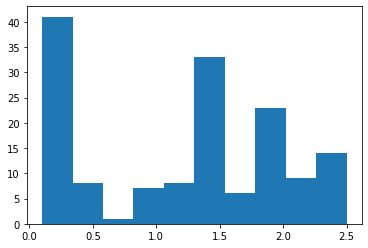

In [15]:
plt.hist(iris.petal_width)

Changing the number of bins can alter the visualization:

(array([ 6.,  0., 28.,  0.,  7.,  0.,  7.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  7.,  0.,  3.,  0.,  5.,  0.,  0., 13.,
         0.,  8.,  0., 12.,  0.,  4.,  0.,  2.,  0., 12.,  0.,  5.,  0.,
         6.,  0.,  6.,  0.,  3.,  0.,  8.,  0.,  3.,  0.,  3.]),
 array([0.1  , 0.148, 0.196, 0.244, 0.292, 0.34 , 0.388, 0.436, 0.484,
        0.532, 0.58 , 0.628, 0.676, 0.724, 0.772, 0.82 , 0.868, 0.916,
        0.964, 1.012, 1.06 , 1.108, 1.156, 1.204, 1.252, 1.3  , 1.348,
        1.396, 1.444, 1.492, 1.54 , 1.588, 1.636, 1.684, 1.732, 1.78 ,
        1.828, 1.876, 1.924, 1.972, 2.02 , 2.068, 2.116, 2.164, 2.212,
        2.26 , 2.308, 2.356, 2.404, 2.452, 2.5  ]),
 <BarContainer object of 50 artists>)

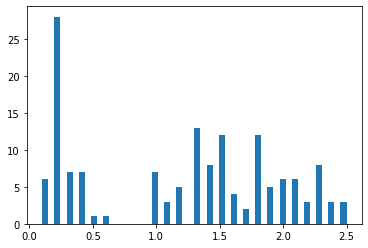

In [16]:
plt.hist(iris.petal_width, bins=50)

## 2D Histograms

We can also bin data by 2 attributes at once:

(array([[33.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  3.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  3.,  3.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2., 19., 11.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2.,  3.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,  4.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  2.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  7.,  4.,  1.]]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <matplotlib.collections.QuadMesh at 0x7ff414141630>)

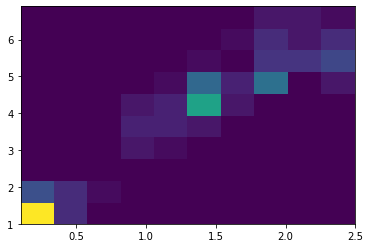

In [17]:
plt.hist2d(iris.petal_width, iris.petal_length)

## Boxplots
Boxplots show us the 25th, 50th and 75th percentiles of the data, along with the min and max:

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4141246a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff414124c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff41416dc88>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff414131278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff414131550>],
 'means': []}

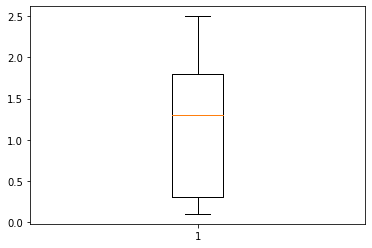

In [18]:
plt.boxplot(iris.petal_width)

We can plot all 4 numerical attributes at the same time.

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff414085c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff414097278>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff414085ba8>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff414097828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff414097b00>,
 'means': []}

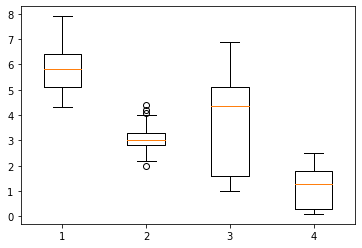

In [19]:
plt.boxplot(iris.iloc[:,0:4])

We can even compare an attribute across species, to see for which it's higher:

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff41403f828>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff41403fdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff41403f780>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff413fce400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff413fce6d8>,
 'means': []}

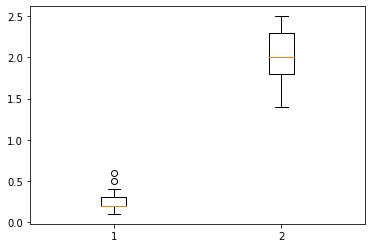

In [20]:
plt.boxplot([
    iris.petal_width[iris.species == 'setosa'],
    iris.petal_width[iris.species == 'virginica']
])

## Scatter Plots

The `scatter_matrix` from `pandas.plotting` function can also show pairwise scatter plots for each pair of variables in a dataframe:

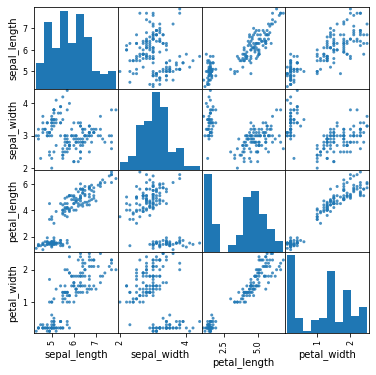

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris.iloc[:,0:4], alpha=0.8, figsize=(6, 6), diagonal="hist");

## Aggregation
In an OLAP data-cube, we need to pick *one or more* attributes to aggregate over, and *one* attribute to summarize. In this case, we will aggregate the `sepal_length` and use `mean` to summarize.

We can aggregate over *one* variable (a 1-D data cube, or a "data line"), in this case "Species":

In [22]:
iris.groupby(by='species').sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

Unlike in a data cube, we can also summarize multiple attributes:

In [23]:
iris.groupby(by='species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster,species_int,label
species,,,,,,,
setosa,5.006,3.418,1.464,0.244,0.00,0,0.00
versicolor,5.936,2.770,4.260,1.326,1.04,1,1.08
virginica,6.588,2.974,5.552,2.026,1.92,2,2.08


Any value we want to aggregate over must be discrete, so to use continuous attributes, we must discretize them:

In [24]:
# Cut will discretize the attribute into 4 equal-width bins
# Note: you can use qcut to get equal-frequency bins
iris['petal_length_disc'] = pd.cut(iris.petal_length, 4)
iris.petal_length_disc.value_counts()

(3.95, 5.425]     61
(0.994, 2.475]    50
(5.425, 6.9]      28
(2.475, 3.95]     11
Name: petal_length_disc, dtype: int64

If we aggregate Petal.Width over our discretized Petal.Length value, we get:


In [25]:
iris.groupby(by='petal_length_disc').petal_width.mean()

petal_length_disc
(0.994, 2.475]    0.244000
(2.475, 3.95]     1.109091
(3.95, 5.425]     1.591803
(5.425, 6.9]      2.082143
Name: petal_width, dtype: float64

We can aggregate over 2 values to get a 2-D data cube. Notice that not all cells have a value, since not all combinations of Species and Petal.Length exist:

In [26]:
iris.groupby(by=['species', 'petal_length_disc']).petal_width.mean()

species     petal_length_disc
setosa      (0.994, 2.475]       0.244000
            (2.475, 3.95]             NaN
            (3.95, 5.425]             NaN
            (5.425, 6.9]              NaN
versicolor  (0.994, 2.475]            NaN
            (2.475, 3.95]        1.109091
            (3.95, 5.425]        1.387179
            (5.425, 6.9]              NaN
virginica   (0.994, 2.475]            NaN
            (2.475, 3.95]             NaN
            (3.95, 5.425]        1.954545
            (5.425, 6.9]         2.082143
Name: petal_width, dtype: float64

We can also use other summarizing functions, such as `count`, or even provide a custom function.

In [27]:
iris.groupby(by=['species', 'petal_length_disc']).petal_width.count()

species     petal_length_disc
setosa      (0.994, 2.475]       50
            (2.475, 3.95]         0
            (3.95, 5.425]         0
            (5.425, 6.9]          0
versicolor  (0.994, 2.475]        0
            (2.475, 3.95]        11
            (3.95, 5.425]        39
            (5.425, 6.9]          0
virginica   (0.994, 2.475]        0
            (2.475, 3.95]         0
            (3.95, 5.425]        22
            (5.425, 6.9]         28
Name: petal_width, dtype: int64